In [94]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import  GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Conv2D,Flatten
from keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.utils import to_categorical

In [95]:
# fix random seed for reproducibility
numpy.random.seed(7)
csv_url='mrec20190331sfft.csv'

In [96]:
MM= pandas.read_csv(csv_url)
#Mdataset=shuffle(MM)
Mdataset=MM
#Mdataset=MM.sample(frac=1)
Mdataset.head(24)

,time,date,training,step,up,slice,F_1,F_2,F_3,F_4,...,F_119,F_120,F_121,F_122,F_123,F_124,F_125,F_126,F_127,F_128
0,1554034538313,13:15:38.313,0,3,1,20749,20.056,94.1213,56.6893,244.1506,...,0.9821,1.6455,1.2656,1.0433,1.3137,2.4414,1.0232,1.2927,0.7879,1.7651
1,1554034538958,13:15:38.958,0,4,1,11691,42.667,47.5442,72.8170,77.0697,...,1.0073,0.9375,0.8401,0.9308,0.8793,1.0529,1.0475,1.0450,1.2355,1.4466
2,1554034539517,13:15:39.517,0,5,1,16388,14.943,104.5249,123.5440,325.2235,...,0.4323,2.3395,1.9636,2.7001,1.6907,1.3859,1.2406,1.8272,2.2453,1.9073
3,1554034540279,13:15:40.279,0,7,1,7260,67.612,65.4221,27.6171,155.5133,...,0.7560,1.1747,0.5885,0.3979,0.7220,0.7708,0.3064,0.8781,0.7001,0.3874
4,1554034540774,13:15:40.774,0,8,1,10254,51.408,151.3434,105.4404,376.3469,...,0.4306,1.2238,1.7379,0.3559,0.4861,1.4681,0.6975,1.1393,1.1507,0.8577
5,1554034541375,13:15:41.375,0,9,1,12306,43.714,197.7310,287.9238,458.5304,...,0.1554,0.9977,0.3534,0.2905,0.0378,0.8668,1.0058,0.3264,0.7247,0.2743
6,1554034542523,13:15:42.523,0,11,1,12275,36.233,4.3915,16.2003,67.3880,...,1.1263,3.0966,0.7637,4.8209,2.8054,2.8560,6.5081,4.1053,4.8375,6.3500
7,1554034542921,13:15:42.921,0,12,1,11018,8.626,32.5530,114.6319,209.5523,...,12.8564,10.8709,12.2103,5.6484,4.5759,3.3081,11.8470,11.5552,9.8679,11.1101
8,1554034543324,13:15:43.324,0,13,1,48631,32.854,117.6710,414.5323,808.1890,...,0.7231,2.2230,0.1032,1.8384,0.9183,1.7533,0.5601,1.9654,1.1408,0.8986
9,1554034543872,13:15:43.872,0,14,1,12990,95.478,328.9371,369.8189,122.3947,...,0.1821,0.3310,0.1429,0.9825,0.4588,1.0916,0.6122,0.9901,0.4200,0.7634


In [97]:
Xdataset=Mdataset.iloc[:,6:]
Xdataset.head(4)

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,...,F_119,F_120,F_121,F_122,F_123,F_124,F_125,F_126,F_127,F_128
0,20.056,94.1213,56.6893,244.1506,297.1014,68.4912,73.1389,86.4008,46.9100,33.9853,...,0.9821,1.6455,1.2656,1.0433,1.3137,2.4414,1.0232,1.2927,0.7879,1.7651
1,42.667,47.5442,72.8170,77.0697,35.0869,51.4889,103.3456,73.5672,6.5732,18.0737,...,1.0073,0.9375,0.8401,0.9308,0.8793,1.0529,1.0475,1.0450,1.2355,1.4466
2,14.943,104.5249,123.5440,325.2235,216.0460,188.1778,216.8083,106.9825,14.6230,98.7340,...,0.4323,2.3395,1.9636,2.7001,1.6907,1.3859,1.2406,1.8272,2.2453,1.9073
3,67.612,65.4221,27.6171,155.5133,82.3221,36.4214,46.7972,11.0348,7.9684,6.5255,...,0.7560,1.1747,0.5885,0.3979,0.7220,0.7708,0.3064,0.8781,0.7001,0.3874


In [98]:
Ydataset = Mdataset['up']
Ydataset.head(14)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
Name: up, dtype: int64

In [99]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Xdataset)
dataset[0]

array([0.05107705, 0.13282973, 0.0315936 , 0.11904173, 0.41328094,
       0.13013288, 0.06080097, 0.17240561, 0.11593018, 0.13377925,
       0.16578296, 0.22347617, 0.18588993, 0.24958625, 0.24999181,
       0.21088881, 0.25110176, 0.23986342, 0.18482355, 0.17883252,
       0.08571672, 0.04426925, 0.07225791, 0.04398994, 0.04239361,
       0.09207876, 0.02792083, 0.05240673, 0.03630493, 0.03536118,
       0.03906149, 0.05114374, 0.31190407, 0.07596091, 0.0062227 ,
       0.11509733, 0.05813498, 0.06469943, 0.03883907, 0.06532665,
       0.08104072, 0.15104461, 0.02481355, 0.04821453, 0.03800076,
       0.06716089, 0.03636204, 0.04252229, 0.02039525, 0.05664509,
       0.08343108, 0.0506808 , 0.05086898, 0.10339523, 0.06999565,
       0.10077718, 0.07215901, 0.05073296, 0.03928588, 0.08224652,
       0.10731719, 0.07810754, 0.09611584, 0.06576441, 0.04820583,
       0.01855257, 0.01783409, 0.0669564 , 0.05401583, 0.02569278,
       0.0042775 , 0.02914104, 0.00444942, 0.01840004, 0.03252

In [100]:
#dataset=dataset.reshape((dataset.shape[0],1,-1))
dataset=dataset.reshape(dataset.shape[0],1,4,32)
print(dataset.shape)
dataset[0,0]

(329, 1, 4, 32)


array([[0.05107705, 0.13282973, 0.0315936 , 0.11904173, 0.41328094,
        0.13013288, 0.06080097, 0.17240561, 0.11593018, 0.13377925,
        0.16578296, 0.22347617, 0.18588993, 0.24958625, 0.24999181,
        0.21088881, 0.25110176, 0.23986342, 0.18482355, 0.17883252,
        0.08571672, 0.04426925, 0.07225791, 0.04398994, 0.04239361,
        0.09207876, 0.02792083, 0.05240673, 0.03630493, 0.03536118,
        0.03906149, 0.05114374],
       [0.31190407, 0.07596091, 0.0062227 , 0.11509733, 0.05813498,
        0.06469943, 0.03883907, 0.06532665, 0.08104072, 0.15104461,
        0.02481355, 0.04821453, 0.03800076, 0.06716089, 0.03636204,
        0.04252229, 0.02039525, 0.05664509, 0.08343108, 0.0506808 ,
        0.05086898, 0.10339523, 0.06999565, 0.10077718, 0.07215901,
        0.05073296, 0.03928588, 0.08224652, 0.10731719, 0.07810754,
        0.09611584, 0.06576441],
       [0.04820583, 0.01855257, 0.01783409, 0.0669564 , 0.05401583,
        0.02569278, 0.0042775 , 0.02914104, 0.0044

In [101]:
# split into train and test sets
train_size = int(len(dataset) * 0.87)
test_size = len(dataset) - train_size
trainX, testX = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(trainX), len(testX))

286 43


In [102]:
# reshape into X=t and Y=t+1
look_width = 48
look_height=32
from sklearn import preprocessing 
from sklearn import utils
from io import StringIO

#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)
le = preprocessing.LabelEncoder()
YN=utils.column_or_1d(Ydataset, warn=True)



In [103]:
YO=le.fit_transform(YN)
YO
len(le.classes_)
Yclasses=len(le.classes_)
print(Yclasses)

2


In [104]:
trainY = YO[0:train_size]
testY=YO[train_size:len(YO)]
print('data:',len(trainY), len(testY))


data: 286 43


In [105]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [106]:
trainX.shape

(286, 1, 4, 32)

In [107]:
# reshape input to be [samples, time steps, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0],  trainX.shape[2],2))
#testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [108]:
print(trainX.shape)
#dataset.shape
print(trainY.shape)
print('trainyo',trainYO.shape)

(286, 1, 4, 32)
(286,)
trainyo (286, 2)


NameError: name 'train' is not defined

In [111]:
model = Sequential()
model.add(Conv2D(32,(3,1) , activation='relu', input_shape=(4,32,1)))
model.add(MaxPooling2D(1))
model.add(Conv2D(8, (3,1), activation='relu'))
#model.add(MaxPooling1D(1))
model.add(Dropout(0.1))
#model.add(Dense(128))
#model.add(Conv1D(128,1 ))

model.add(Flatten())
#model.add(Conv1D(128,1 ))
#model.add(MaxPooling1D())
#model.add(Conv1D(128, 1, activation='relu'))
#model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(Yclasses, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 32, 30, 1)         416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 30, 1)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 8, 28, 1)          776       
_________________________________________________________________
dropout_38 (Dropout)         (None, 8, 28, 1)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 224)               0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 224)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 450       
Total para

In [112]:
trainYO = to_categorical(trainY, num_classes=Yclasses)
testYO = to_categorical(testY, num_classes=Yclasses)

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.fit(trainX, trainYO, epochs=170)


ValueError: Error when checking input: expected conv2d_77_input to have shape (4, 32, 1) but got array with shape (1, 4, 32)

#### trainYO = to_categorical(trainY, num_classes=Yclasses)
testYO = to_categorical(testY, num_classes=Yclasses)

#model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainYO, epochs=150)


In [109]:
score = model.evaluate(testX, testYO)
print(score)

RuntimeError: The model needs to be compiled before being used.

In [48]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

286/286 [==============================] - 0s 182us/step
Test loss: 0.151658737888703
Test accuracy: 0.9650349654517807


In [49]:
# Keras reported accuracy:
score = model.evaluate(testX,testYO, verbose=0) 
print(score[1])
# 0.98580000000000001

# Actual accuracy calculated manually:
predY= model.predict(trainX)
acc = sum([numpy.argmax(trainYO[i])==numpy.argmax(predY[i]) for i in range(len(trainYO))])/len(trainYO)
print(acc)
# 0.98580000000000001

print(score[1]==acc)
# True    

0.534883722316387
0.965034965034965
False


In [41]:
# make predictions
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
#trainPredict1

In [42]:
#softmax(trainPredict)
trainPredict=numpy.argmax(trainPredict1,1)
testPredict=numpy.argmax(testPredict1,1)
diffY=testPredict-testY

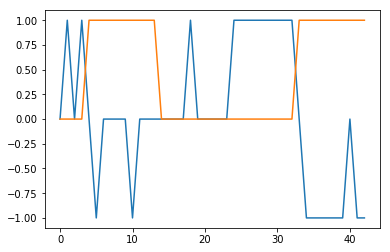

In [44]:
plt.plot(diffY)
plt.plot(testY)
plt.show()

In [71]:

# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [72]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 5.460 RMSE
Test Score: 5.301 RMSE


In [73]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
print(trainPredictPlot.shape)
trainPredictPlot[look_back:len(trainPredict)+look_back, 0] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)-7:len(dataset)-9, 0] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

(578, 256, 1)


NameError: name 'look_back' is not defined

In [74]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=2;
trainPredictPlot[wws:len(trainPredict)+wws,0] = trainPredict
wws=60
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-look_back-1, 0] = testPredict
# plot baseline and predictions

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(trainY,label="set")
ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="testm")
#plt.figure(figsize=(15,3))

plt.legend()
plt.show()

ValueError: could not broadcast input array from shape (387) into shape (387,1)